In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

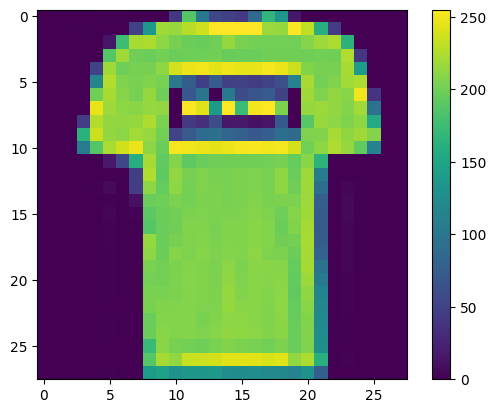

In [9]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()

In [10]:
train_images=train_images/255.0
test_images=test_images/255.0

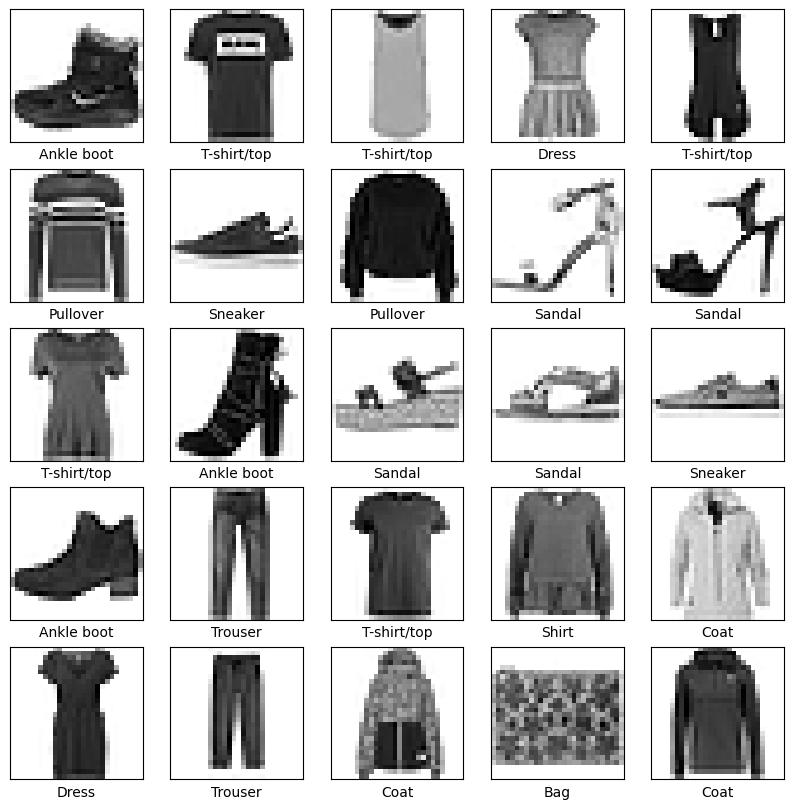

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
type(test_images)

numpy.ndarray

In [15]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4969 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3744 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3359 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3098 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2927 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2817 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2671 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2563 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2447 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.239

In [16]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\nTest accuracy:',test_acc)

313/313 - 1s - loss: 0.3430 - accuracy: 0.8789 - 611ms/epoch - 2ms/step

Test accuracy: 0.8788999915122986


In [17]:
model_prediction=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [18]:
predictions=model_prediction.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [20]:
predictions[0]

array([4.5737827e-10, 7.1574924e-13, 1.5352275e-11, 1.3526050e-15,
       1.3373705e-10, 3.1905348e-04, 1.7550150e-07, 8.0556382e-04,
       5.1238715e-09, 9.9887526e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
def plot_image(i,prediction_array,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label=np.argmax(prediction_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color= 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(prediction_array),
                                       class_names[true_label]),
             color=color)

In [23]:
def plot_value_array(i,prediction_array,true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot=plt.bar(range(10),prediction_array,color="#777777")
  plt.ylim([0,1])
  predicted_label=np.argmax(prediction_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

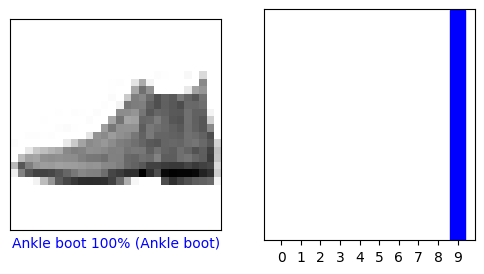

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

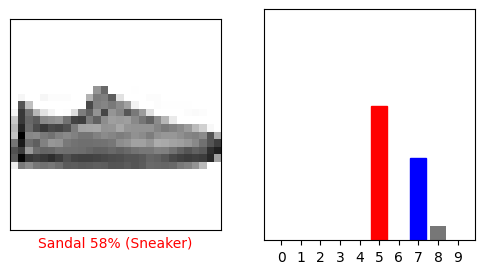

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

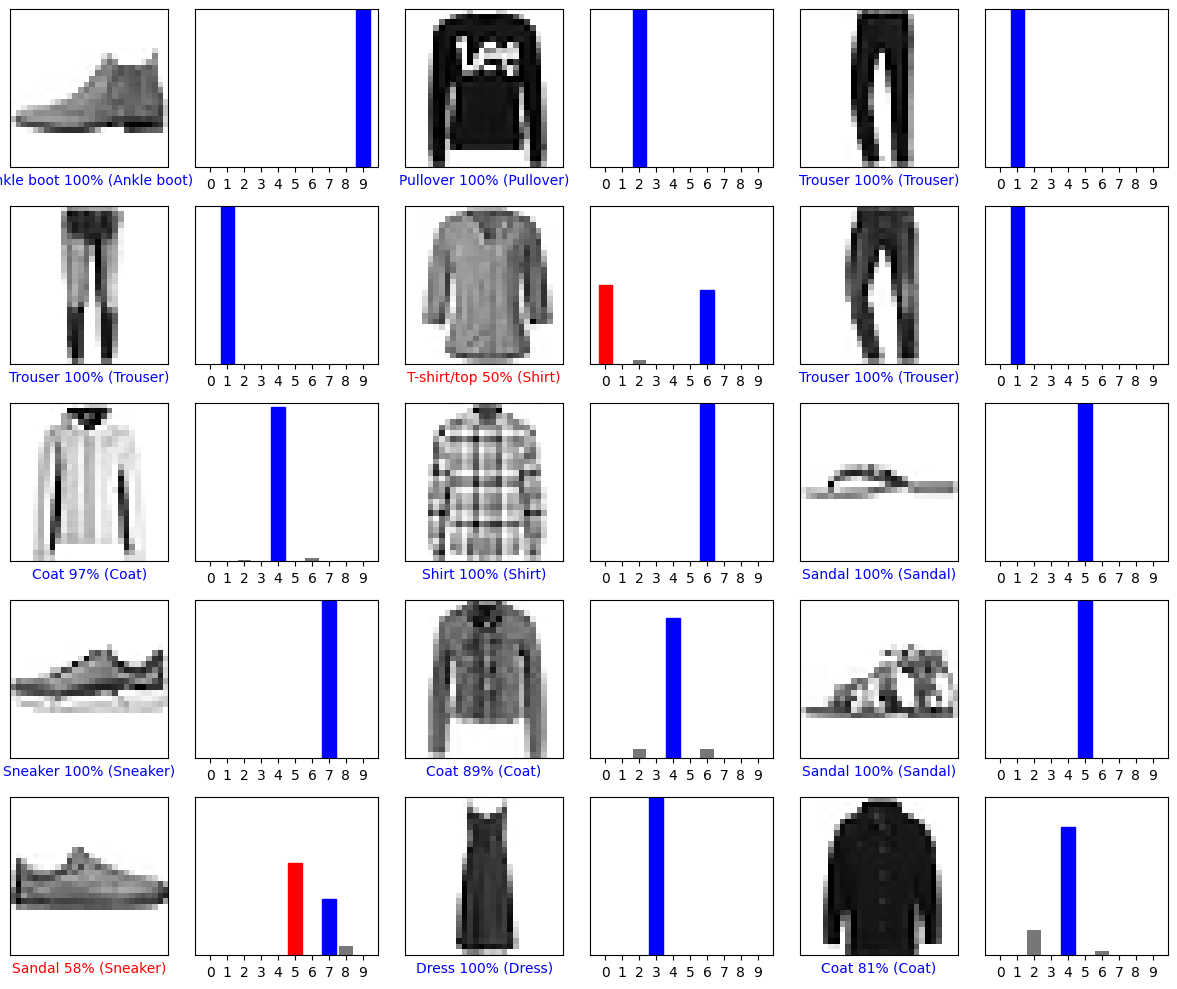

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = model_prediction.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 27ms/step
[[7.65578414e-04 8.62309876e-11 9.96155202e-01 1.82578161e-10
  2.42047710e-03 6.48480767e-14 6.58686855e-04 1.13156444e-14
  1.97318814e-10 9.18497117e-14]]


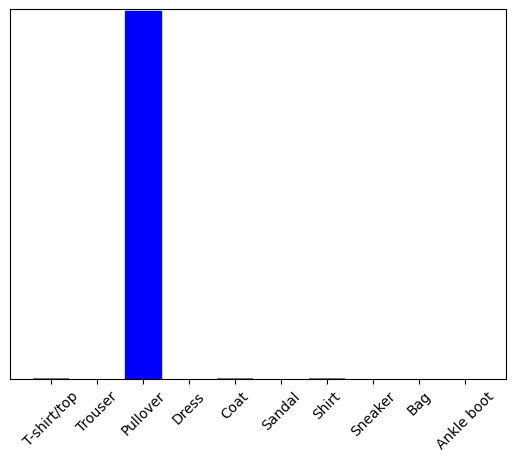

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()